In [157]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log, exp

In [80]:
def normal_sample(N, random_state=None):
    np.random.seed(random_state)
    return np.random.normal(0, 1, size=(N))

def brownian_motion(T, N, random_state=None):
    dW = normal_sample(N) * sqrt (T / N)
    return np.insert(dW.cumsum(), 0, 0)

def correlated_sample (sample, rho):
    uncorrelated_sample = normal_sample(len(sample))
    return rho * sample + sqrt(1 - rho ** 2) * uncorrelated_sample

def correlated_brownian_motions(T, N, rho, random_state=None):
    sample1 = normal_sample(N)
    sample2 = correlated_sample(sample1, rho)
    dW1 = sample1 * sqrt (T / N)
    dW2 = sample2 * sqrt (T / N)
    return np.asarray([np.insert(dW1.cumsum(), 0, 0), np.insert(dW2.cumsum(), 0, 0)]).T

def GBM(T, N, mu, sigma, S_0, random_state=None):
    time = np.linspace(0, T, N+1)
    W = brownian_motion(T, N)
    S = S_0 * np.exp((mu - (sigma ** 2) / 2) * time + sigma * W)
    return (S)

def UO (T, N, alpha, gamma, sigma, S_0, random_state=None):
    time = np.linspace(0, T, N+1)
    dW = normal_sample(N) * sqrt (T / N)
    integral = np.insert(np.cumsum(np.exp(alpha * time[1:]) * dW), 0, 0)
    S = S_0 * np.exp(-alpha * time) + gamma * (1 - np.exp(-alpha * time)) + \
    sigma * np.exp(-alpha * time) * integral
    return S

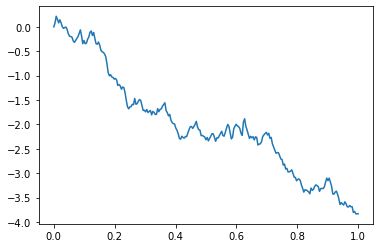

In [81]:
plt.plot(np.linspace(0,1,253), brownian_motion(1, 252))

In [82]:
correlated_brownian_motions(1, 252, 0.6)

array([[ 0.00000000e+00,  0.00000000e+00],
       [-9.84761081e-03, -4.42124076e-02],
       [-1.23909579e-01, -9.29467243e-02],
       [-1.36724471e-01, -3.68397145e-03],
       [-1.05770357e-01,  4.65321380e-02],
       [-3.61454765e-02,  4.62742053e-02],
       [-8.22723184e-02,  5.83519425e-02],
       [ 2.89495690e-02,  3.63812471e-02],
       [ 1.62792155e-02,  1.52531316e-02],
       [ 4.51982967e-02,  2.35313109e-02],
       [ 1.00824789e-01, -1.49962844e-02],
       [ 1.04169048e-01, -2.18234125e-02],
       [ 2.17039696e-02, -8.64888224e-02],
       [ 9.34428674e-03, -7.70232145e-02],
       [-8.62712223e-02, -1.51989801e-01],
       [-7.90757391e-03, -1.94116312e-02],
       [-3.41115788e-02,  4.43020078e-02],
       [-6.92422592e-02,  8.24608679e-02],
       [ 2.45497354e-02,  5.61035744e-02],
       [ 3.58894338e-02,  1.07217670e-01],
       [-6.61208477e-02, -1.75452693e-02],
       [ 1.15729070e-02,  7.13191512e-02],
       [ 1.42458288e-02,  3.07800226e-02],
       [ 4.

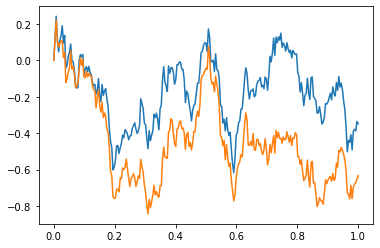

In [83]:
plt.plot(np.linspace(0, 1, 253), correlated_brownian_motions(1, 252, 0.9))

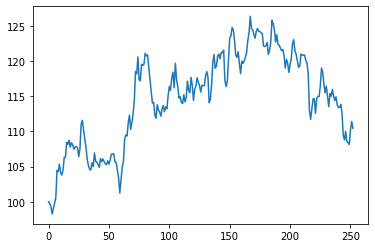

In [84]:
plt.plot(GBM(1, 252, 0.2, 0.2, 100))

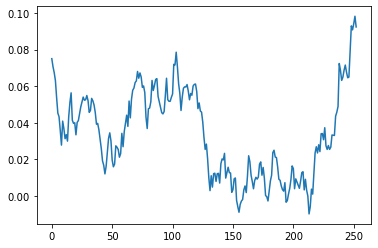

In [85]:
plt.plot(UO(1, 252, 1, 0.055, 0.1, 0.075))

In [146]:
simulations = np.zeros([253, 10000])
for i in range(10000):
    simulations[:,i] = GBM(1, 252, 0.2, 0.2, 100)

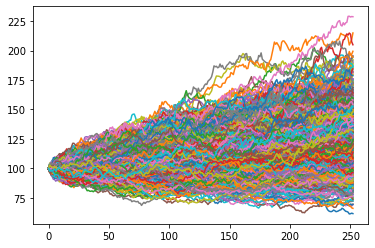

In [114]:
plt.plot(simulations)

In [150]:
np.log(simulations[-1]/100).std()

0.19784454997240006

In [152]:
(np.log(simulations[-1]/100) + 0.5 * (0.2 ** 2)).mean()

0.20019654130439757

In [155]:
(simulations[-1]/100).mean()

1.2210406798061995

In [158]:
exp(0.2)

1.2214027581601699